In [113]:
import numpy as np
import pickle
from scipy.stats import binom
import matplotlib.pyplot as plt
import pandas as pd 
import pickle

%matplotlib inline

np.random.seed(0)

In [114]:
data = pd.read_table('../data/data_nam.txt', sep=' ',header=0)

In [115]:
data.head()

,IndivID,PopID,Pop,Country,Continent,sex,lat,long,L1.125,L1.130,...,L677.255.553287981859,L677.259,L677.263,L677.267,L678.202,L678.206,L678.209.848101265823,L678.210,L678.214,L678.218
Chipewyan29,2012,811,Chipewyan,Canada,AMERICA,0,59.55,-107.3,0,0,...,0,0,0,0,0,0,0,1,0,0
Chipewyan31,2156,811,Chipewyan,Canada,AMERICA,0,59.55,-107.3,0,0,...,0,0,0,0,0,0,1,0,0,0
Chipewyan33,2381,811,Chipewyan,Canada,AMERICA,0,59.55,-107.3,0,0,...,0,0,0,0,0,1,0,0,0,0
Chipewyan35,2382,811,Chipewyan,Canada,AMERICA,0,59.55,-107.3,0,0,...,0,0,0,0,0,0,0,1,0,0
Chipewyan37,2383,811,Chipewyan,Canada,AMERICA,0,59.55,-107.3,0,0,...,0,1,0,0,0,0,0,1,0,0


# Analysis

Names of the different populations.

In [116]:
print('Names of the different populations:\n', np.unique(data['Pop']), '\n')
print('Number of populations: ', len(np.unique(data['Pop'])))

Names of the different populations:
 ['Ache' 'Arhuaco' 'Aymara' 'Cabecar' 'Chipewyan' 'Cree' 'Embera' 'Guarani'
 'Guaymi' 'Huilliche' 'Inga' 'Kaingang' 'Kaqchikel' 'Karitiana' 'Kogi'
 'Maya' 'Mixe' 'Mixtec' 'Ojibwa' 'Piapoco' 'Pima' 'Quechua' 'Surui'
 'TicunaArara' 'Waunana' 'Wayuu' 'Zapotec'] 

Number of populations:  27


In [117]:
print('Coordinates of the different populations:\n')
data[['Pop', 'long', 'lat']].set_index('Pop').drop_duplicates()

Coordinates of the different populations:



,long,lat
Pop,,
Chipewyan,-107.3,59.55
Cree,-102.5,50.33
Ojibwa,-81.0,46.50
Kaqchikel,-91.0,15.00
Mixtec,-97.0,17.00
Mixe,-96.0,17.00
Zapotec,-97.0,16.00
Guaymi,-82.0,8.50
Cabecar,-84.0,9.50


## PCA and Regression : Data

In [118]:
data_aux = data.copy()
data_aux = data_aux.drop(data.columns[0:6], axis=1)
x = data_aux.drop(data_aux.columns[0:2], axis=1).values
y_long = data['long'].values
y_lat = data['lat'].values

In [ ]:
# Save data.
# pickle.dump(x, open('../data/data_nam_clean.matrix', 'wb'), -1)

In [119]:
from sklearn.decomposition import PCA

pca = PCA(100).fit(x)
comp = pca.transform(x)

In [153]:
from sklearn.linear_model import LinearRegression

reg_long = LinearRegression()
reg_lat = LinearRegression()

reg_long.fit(comp, y_long)
reg_lat.fit(comp, y_lat)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [146]:
from sklearn.svm import SVR

reg_long = SVR()
reg_lat = SVR()

reg_long.fit(comp, y_long)
reg_lat.fit(comp, y_lat)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [154]:
x_long = reg_long.predict(comp)
x_lat = reg_lat.predict(comp)

## PCA and Regression : Generated Data

In [155]:
import matplotlib.pyplot as plt 

x_gen = np.load('../generated/synthetic_data_nam.npy')

In [156]:
x_gen = np.round(x_gen)

In [157]:
from sklearn.decomposition import PCA

pca_gen = PCA(100).fit(x_gen)
comp_gen = pca.transform(x_gen)

In [158]:
x_gen_long = reg_long.predict(comp_gen)
x_gen_lat = reg_lat.predict(comp_gen)

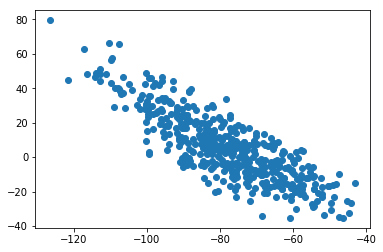

In [159]:
plt.scatter(x_gen_long, x_gen_lat )

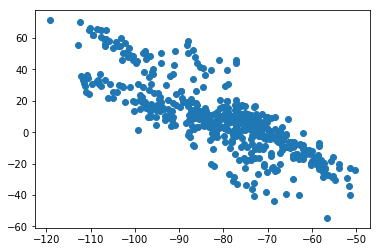

In [160]:
plt.scatter(x_long, x_lat)